# Data Definition
media_id - identifiant of the song listened by the user  
album_id - identifiant of the album of the song  
media_duration - duration of the song  
user_gender -  gender of the user  
user_id -  anonymized id of the user  
context_type - type of content where the song was listened: playlist, album ...  
release_date - release date of the song with the format YYYYMMDD  
ts_listen - timestamp of the listening in UNIX time  
platform_name - type of os  
platform_family - type of device  
user_age - age of the user  
listen_type - if the songs was listened in a flow or not  
artist_id - identifiant of the artist of the song  
genre_id - identifiant of the genre of the song  
is_listened - 1 if the track was listened, 0 otherwise  

## Data Preperation

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [11]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 3)

In [12]:
df = pd.read_csv("../data/train.csv")

In [13]:
df.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
0,25471,1480597215,222606,41774,12,20040704,1,0,223,0,0,9241,55164,29,0
1,25571,1480544735,250467,43941,0,20060301,2,1,171,0,0,16547,55830,30,1
2,16,1479563953,305197,48078,1,20140714,2,1,149,1,1,7665,2704,29,1
3,7,1480152098,900502,71521,0,20001030,0,0,240,0,1,1580,938,30,0
4,7,1478368974,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1


In [14]:
df.shape

(7558834, 15)

In [15]:
df.dtypes

genre_id           int64
ts_listen          int64
media_id           int64
album_id           int64
context_type       int64
release_date       int64
platform_name      int64
platform_family    int64
media_duration     int64
listen_type        int64
user_gender        int64
user_id            int64
artist_id          int64
user_age           int64
is_listened        int64
dtype: object

In [ ]:
# format data

In [ ]:
df_form = df.copy()
df_form["ts_listen"] = pd.to_datetime(df["ts_listen"], 
                                           unit="s")
df_form = df_form[df_form["ts_listen"] > "2016-11-01"]

df_form["release_date"] = df_form["release_date"].astype(str)
df_form["release_date"].head()
df_form["release_date"] = pd.to_datetime(df_form["release_date"], 
                                              format='%Y%m%d',
                                              errors="coerce")
cats = ["genre_id", 
        "media_id", 
        "album_id", 
        "context_type", 
        "platform_name", 
        "platform_family", 
        "listen_type", 
        "user_gender",
        "user_id", 
        "artist_id", 
        "is_listened"]

df_form[cats] = df_form[cats].astype("category")
dff = df_form
dff

In [43]:
dff.dtypes

genre_id                 category
ts_listen          datetime64[ns]
media_id                 category
album_id                 category
context_type             category
release_date       datetime64[ns]
platform_name            category
platform_family          category
media_duration              int64
listen_type              category
user_gender              category
user_id                  category
artist_id                category
user_age                    int64
is_listened              category
dtype: object

In [60]:
dff.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
0,25471,2016-12-01 13:00:15,222606,41774,12,2004-07-04,1,0,223,0,0,9241,55164,29,0
1,25571,2016-11-30 22:25:35,250467,43941,0,2006-03-01,2,1,171,0,0,16547,55830,30,1
2,16,2016-11-19 13:59:13,305197,48078,1,2014-07-14,2,1,149,1,1,7665,2704,29,1
3,7,2016-11-26 09:21:38,900502,71521,0,2000-10-30,0,0,240,0,1,1580,938,30,0
4,7,2016-11-05 18:02:54,542335,71718,0,2008-02-15,0,0,150,0,1,1812,2939,24,1


## Understanding the data

In [45]:
dff['is_listened'].value_counts() # approx 2/3 of samples are considered as listened

1    5140475
0    2376104
Name: is_listened, dtype: int64

In [48]:
dff['genre_id'].value_counts() # there are 2919 genres and subgenres in the set - no aggregation possible, since not labeled

0         3645980
7          924767
10         286389
25         267504
27         186987
           ...   
106465          1
146065          1
857             1
6850            1
3598            1
Name: genre_id, Length: 2919, dtype: int64

In [49]:
gb = dff.groupby("user_id")["genre_id"].nunique().reset_index()
gb.columns = "user_id", "counts"
#gb[gb["counts"]<10]
gb
# some users listen to many diffrent genres

,user_id,counts
0,0,129
1,1,139
2,2,183
3,3,281
4,4,118
...,...,...
19795,19910,1
19796,19911,1
19797,19912,1
19798,19913,1


In [33]:
dff[dff.isna().any(axis=1)] # there are no missing values in the set

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened


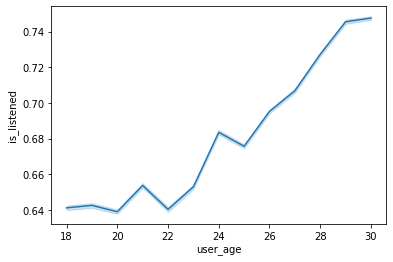

In [51]:
sns.lineplot(x="user_age", y="is_listened", data=df)
plt.show()

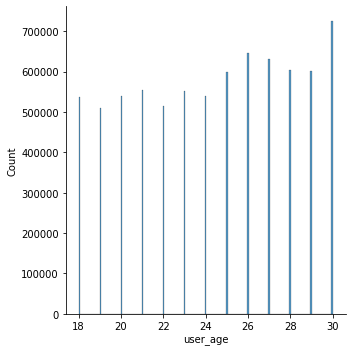

In [52]:
sns.displot(df, x="user_age") # age is almost equally distributed

A classification problem in machine learning is where we have given some input (independent variables), and we have to predict a discrete target. It is highly possible that the distribution of discrete values will be very different. Due to this difference in each class, the algorithms tend to get biased towards the majority values present and don’t perform well on the minority values.

This difference in class frequencies affects the overall predictability of the model. (https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/)

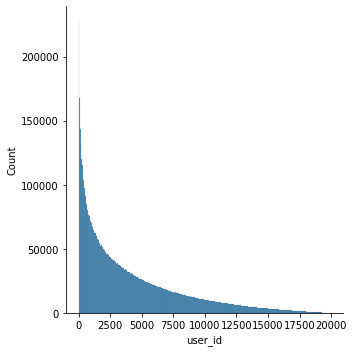

In [53]:
sns.displot(df, x="user_id") # unbalanced dist. - need to handle with weights

In [55]:
correl = df.corr()

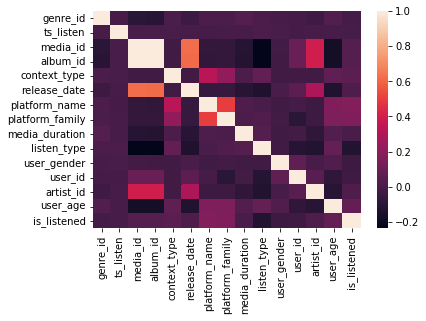

In [58]:
sns.heatmap(correl) # considerates only linear correlation - one should not drop some features to early

In [59]:
dff.to_csv('../data/train-prep.csv')

# Issues
* Many categorial variable with categories with very few observations - heavy to analyse and model
* A song can be affiliated  to multiple genres - we don't know all affiliations. We know only one. They should have defined
  upper generes and subgenres.
* We have almost no knowledge about audio content - eg: beat tempo
* The context is not precise enough. We have only one context type per sample. They should have divided context in diffrent 
  types, that they could be combined. Eg: context1 = mood, context2= location, context3 = weather conditions ....
* imbalanced classes
